In [3]:
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from windrose import WindroseAxes
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/benin-malanville.csv")

In [ ]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

In [ ]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")

In [6]:
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

EDA for *benin-malanville*

Summary Statistics

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [7]:
df.select_dtypes(include='number').describe().T

count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600.0    8.582407    6.385864    0.0    3.7    8.6   12.3   
BP             525600.0  994.197199    2.474993  985.0  993.0  994.0  996.0   
Cleaning       525600.0    0.000923    0.030363    0.0    0.0    0.0    0.0   
Precipitation  525600.0    0.001905    0.037115    0.0    0.0    0.0    0.0   
TModA          525600.0   35.246026   14.807258    9.0   24.2   30.0   46.9   
TModB          525600.0   32.471736   12.348743    8.1   23.6   28.9   41.5   
Comments            0.0         NaN         NaN    NaN    NaN    NaN    NaN   

                  max  
GHI            1413.0  
DNI             952.3  
DHI             759.2  
ModA           1342.3  
ModB           1342.3  
Tamb             43.8  
RH              100.0  
WS               19.5  
WSgust           26.6  
WSstdev           4.2  
WD              360.0  
WDstdev          99.4  
BP             1003.0  
Cleaning          1.0  
Precipitation     2.5  
TModA            81.0  
TModB            72.5  
Comments          NaN

Data Quality Check: Look for missing values, outliers, or incorrect entries (e.g., negative values where only positive should exist), especially in columns like GHI, DNI, and DHI and check for outliers, especially in sensor readings (ModA, ModB) and wind speed data (WS, WSgust)

To perform a data quality check in the dataset, especially focusing on missing values, outliers, and incorrect entries (like negative values where only positive ones should exist), I can follow these steps using Pandas and other tools. Below is a comprehensive approach to check for data issues in columns such as GHI (Global Horizontal Irradiance), DNI (Direct Normal Irradiance), DHI (Diffuse Horizontal Irradiance), as well as sensor readings ModA, ModB, and wind speed data (WS, WSgust).

1. Check for Missing Values
I use isnull() and sum() to identify columns with missing values (NaN or None):

In [8]:
missing_values = df.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
negative_values = df[columns_to_check].lt(0).sum()
negative_values

GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64

In [10]:
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

# Check for outliers in specific columns
columns_to_check_for_outliers = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outliers = detect_outliers(df, columns_to_check_for_outliers)
outliers

{'GHI': 145,
 'DNI': 15196,
 'DHI': 8733,
 'ModA': 98,
 'ModB': 240,
 'WS': 6717,
 'WSgust': 5368}

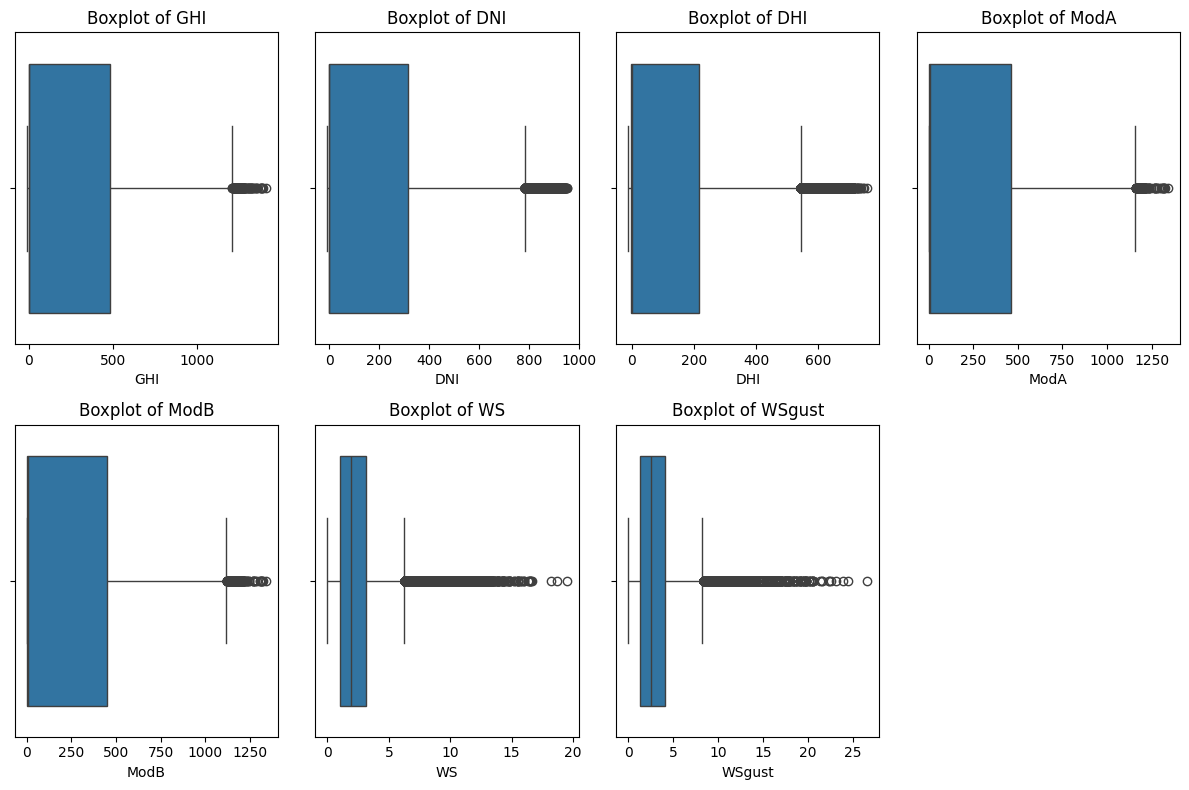

In [11]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check_for_outliers, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [12]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

In [ ]:
df = df.drop_duplicates()


In [13]:
invalid_ws = df[(df['WS'] < 0) | (df['WSgust'] < 0) | (df['WSgust'] > 100)].shape[0]
invalid_ws

0

Time Series Analysis: Plot bar charts or line charts  of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
 Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

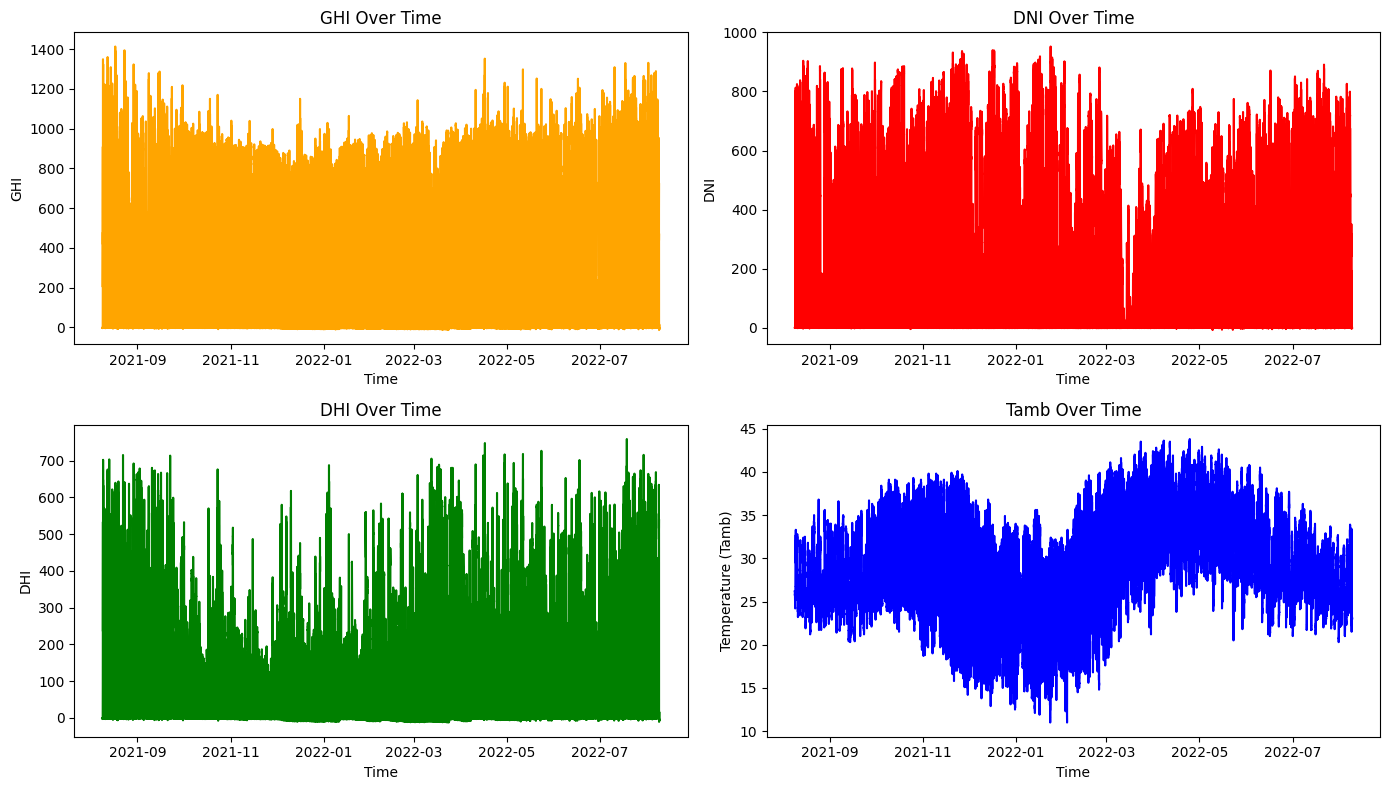

In [18]:
plt.figure(figsize=(14, 8))

# GHI
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='orange')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
# DNI
plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='red')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')

# DHI
plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')

# Tamb
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='blue')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (Tamb)')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2252\572213097.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


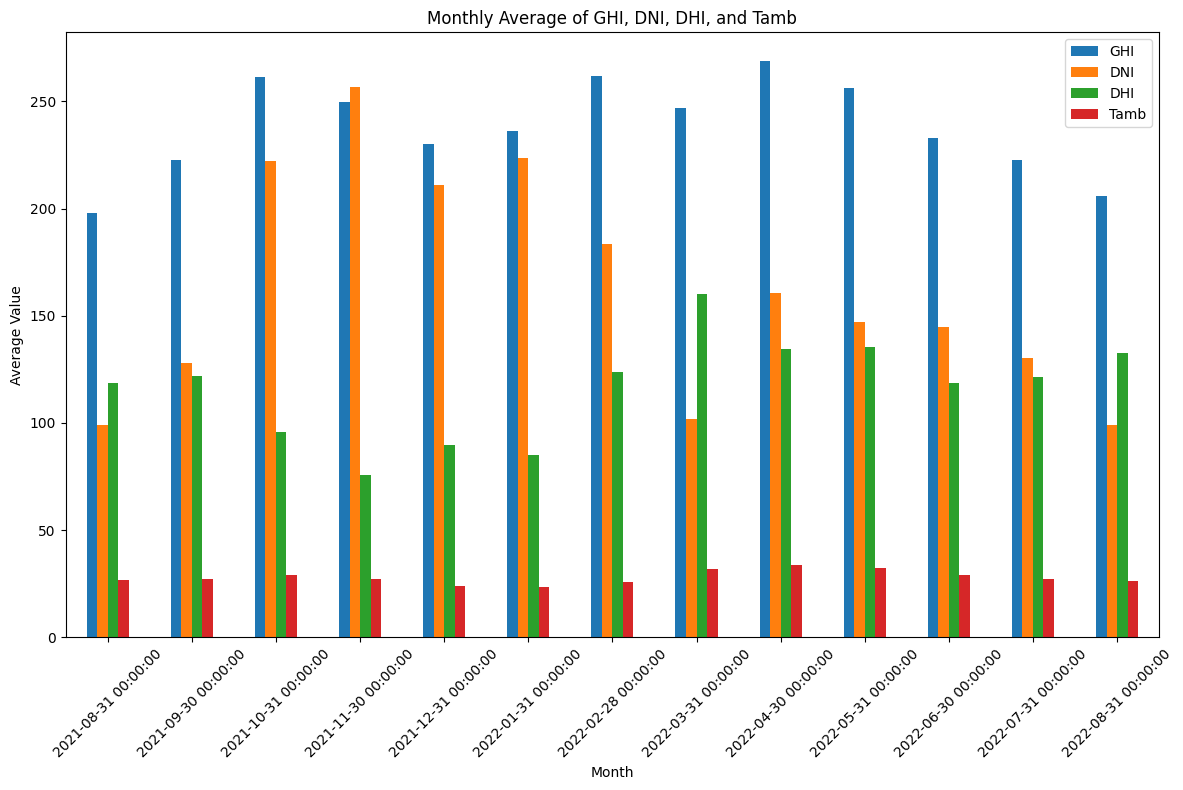

In [19]:
# Resampling to monthly frequency and taking the mean
monthly_data = df.resample('M').mean()

# Plotting monthly averages
monthly_data[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(12, 8))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Separate cleaned and uncleaned data
cleaned_data = df[df['Cleaning'] == 'cleaned']
uncleaned_data = df[df['Cleaning'] == 'uncleaned']

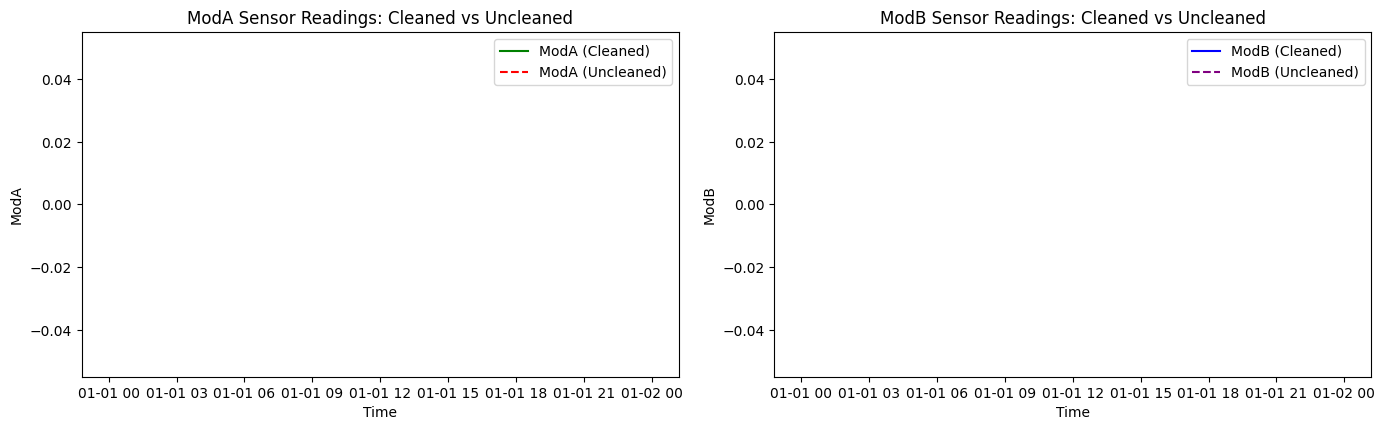

In [21]:
plt.figure(figsize=(14, 8))

# ModA Comparison
plt.subplot(2, 2, 1)
plt.plot(cleaned_data.index, cleaned_data['ModA'], label='ModA (Cleaned)', color='green')
plt.plot(uncleaned_data.index, uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red', linestyle='dashed')
plt.title('ModA Sensor Readings: Cleaned vs Uncleaned')
plt.xlabel('Time')
plt.ylabel('ModA')
plt.legend()

# ModB Comparison
plt.subplot(2, 2, 2)
plt.plot(cleaned_data.index, cleaned_data['ModB'], label='ModB (Cleaned)', color='blue')
plt.plot(uncleaned_data.index, uncleaned_data['ModB'], label='ModB (Uncleaned)', color='purple', linestyle='dashed')
plt.title('ModB Sensor Readings: Cleaned vs Uncleaned')
plt.xlabel('Time')
plt.ylabel('ModB')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
# Compare means before and after cleaning
mean_modA_cleaned = cleaned_data['ModA'].mean()
mean_modA_uncleaned = uncleaned_data['ModA'].mean()
mean_modB_cleaned = cleaned_data['ModB'].mean()
mean_modB_uncleaned = uncleaned_data['ModB'].mean()

print(f"Mean ModA (Cleaned): {mean_modA_cleaned}, Mean ModA (Uncleaned): {mean_modA_uncleaned}")
print(f"Mean ModB (Cleaned): {mean_modB_cleaned}, Mean ModB (Uncleaned): {mean_modB_uncleaned}")


Mean ModA (Cleaned): nan, Mean ModA (Uncleaned): nan
Mean ModB (Cleaned): nan, Mean ModB (Uncleaned): nan


In [23]:
# Select relevant columns (GHI, DNI, DHI, TModA, TModB, WS, WSgust, WD)
correlation_data = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']]

# Compute the correlation matrix
corr_matrix = correlation_data.corr()
corr_matrix

GHI       DNI       DHI     TModA     TModB        WS    WSgust  \
GHI     1.000000  0.882376  0.849989  0.920127  0.874338  0.457349  0.484144   
DNI     0.882376  1.000000  0.546602  0.790340  0.756007  0.397099  0.419469   
DHI     0.849989  0.546602  1.000000  0.825012  0.777829  0.426959  0.450904   
TModA   0.920127  0.790340  0.825012  1.000000  0.983443  0.429899  0.458782   
TModB   0.874338  0.756007  0.777829  0.983443  1.000000  0.400509  0.430020   
WS      0.457349  0.397099  0.426959  0.429899  0.400509  1.000000  0.984599   
WSgust  0.484144  0.419469  0.450904  0.458782  0.430020  0.984599  1.000000   
WD      0.079664  0.018839  0.102752  0.164692  0.205442  0.238566  0.257456   

              WD  
GHI     0.079664  
DNI     0.018839  
DHI     0.102752  
TModA   0.164692  
TModB   0.205442  
WS      0.238566  
WSgust  0.257456  
WD      1.000000

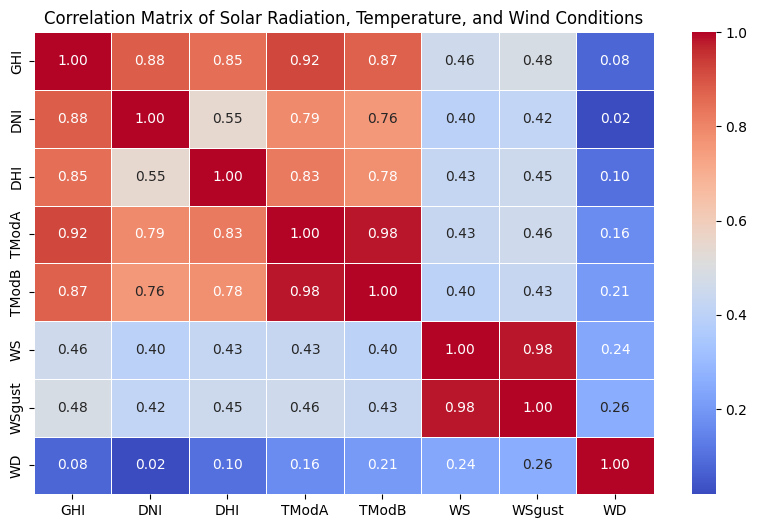

In [24]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation, Temperature, and Wind Conditions')
plt.show()


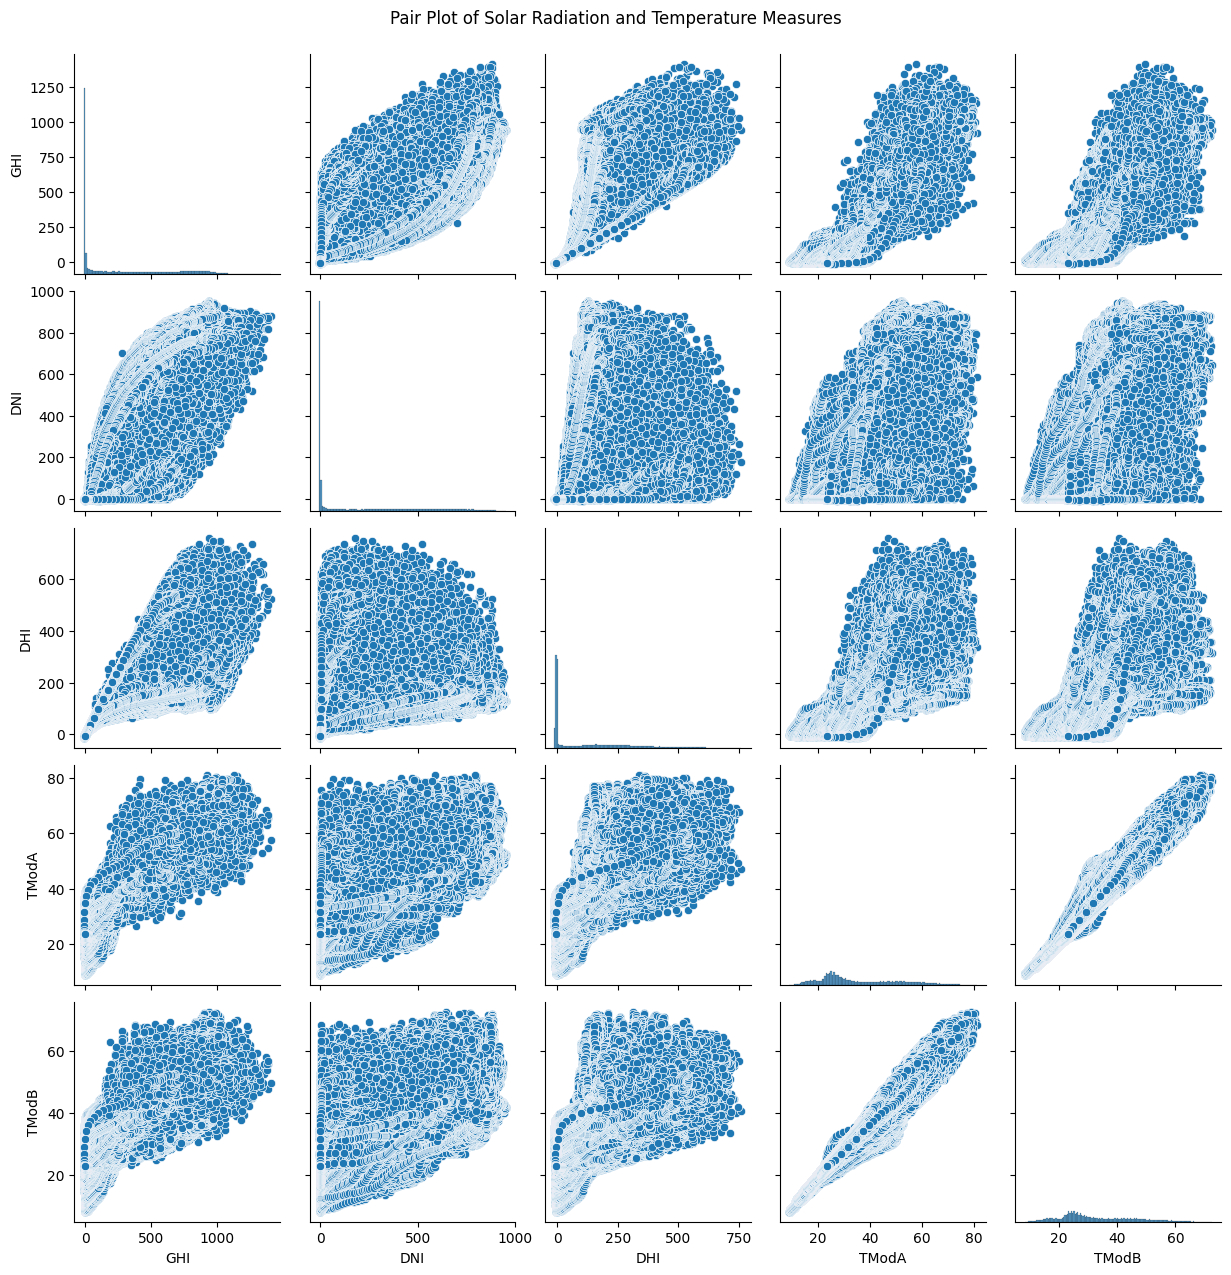

In [25]:
# Plotting pair plot for solar radiation components (GHI, DNI, DHI) and temperature (TModA, TModB)
sns.pairplot(correlation_data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()


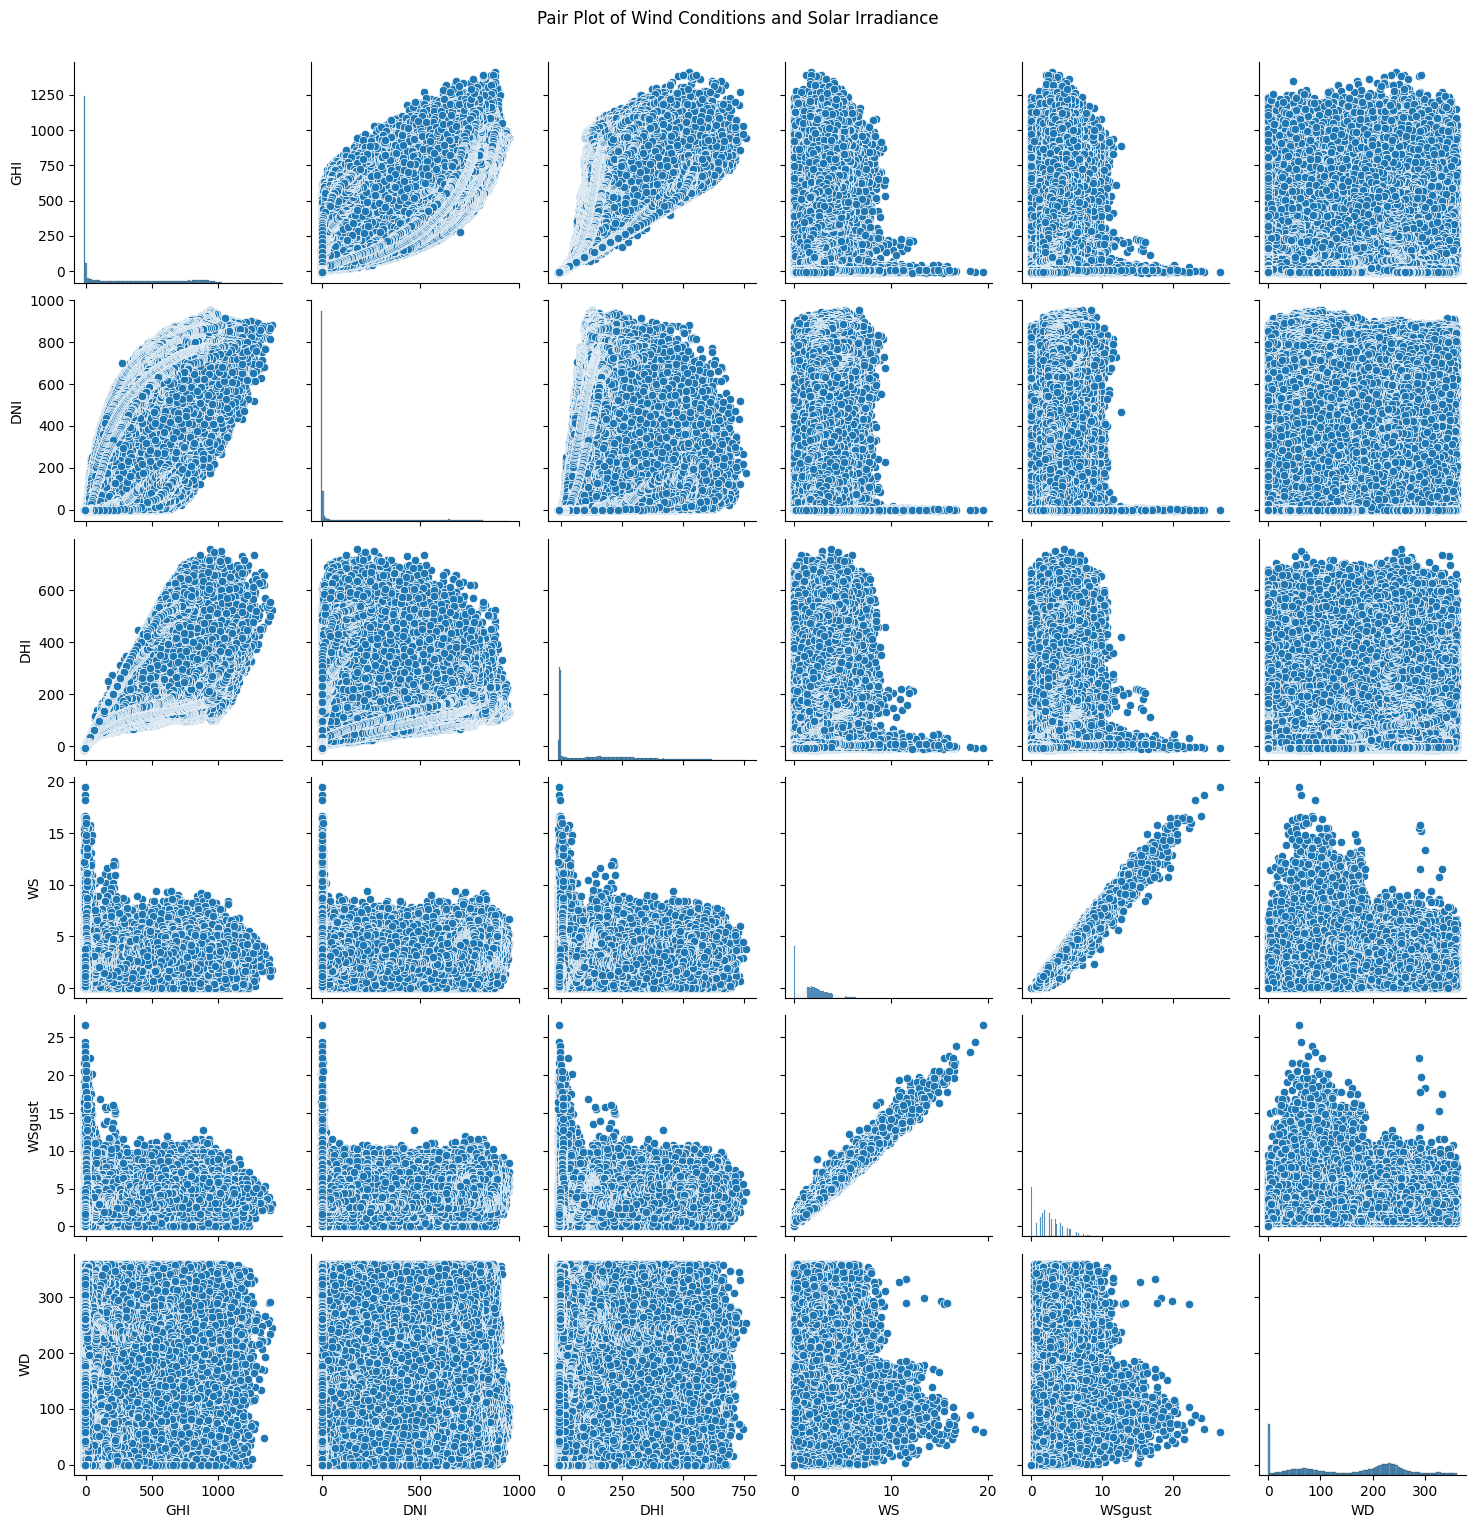

In [26]:
# Plotting pair plot for wind conditions (WS, WSgust, WD) and solar irradiance (GHI, DNI, DHI)
sns.pairplot(correlation_data[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']])
plt.suptitle('Pair Plot of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()


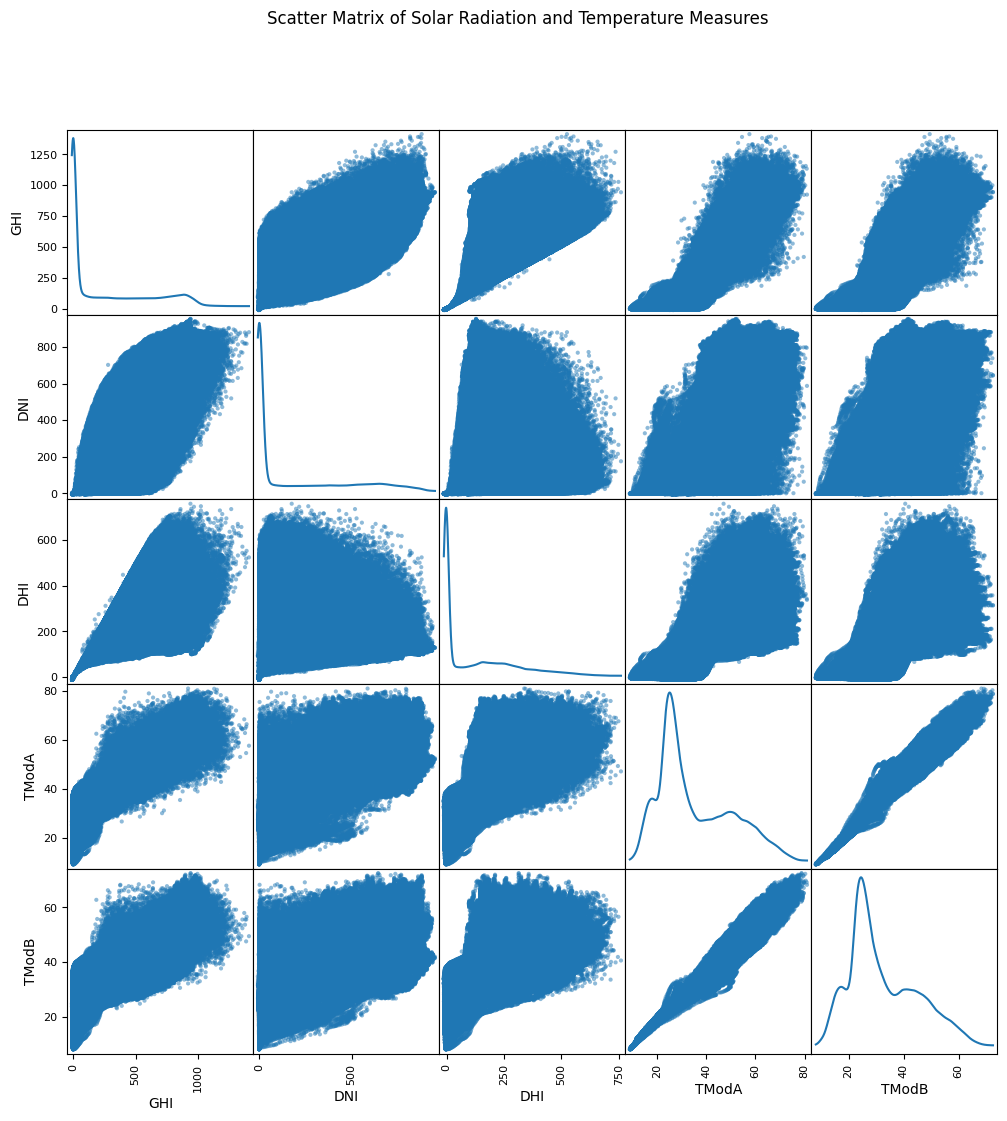

In [30]:
# Creating scatter matrix for solar irradiance (GHI, DNI, DHI) and temperature (TModA, TModB)
scatter_matrix(correlation_data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Solar Radiation and Temperature Measures')
plt.show()


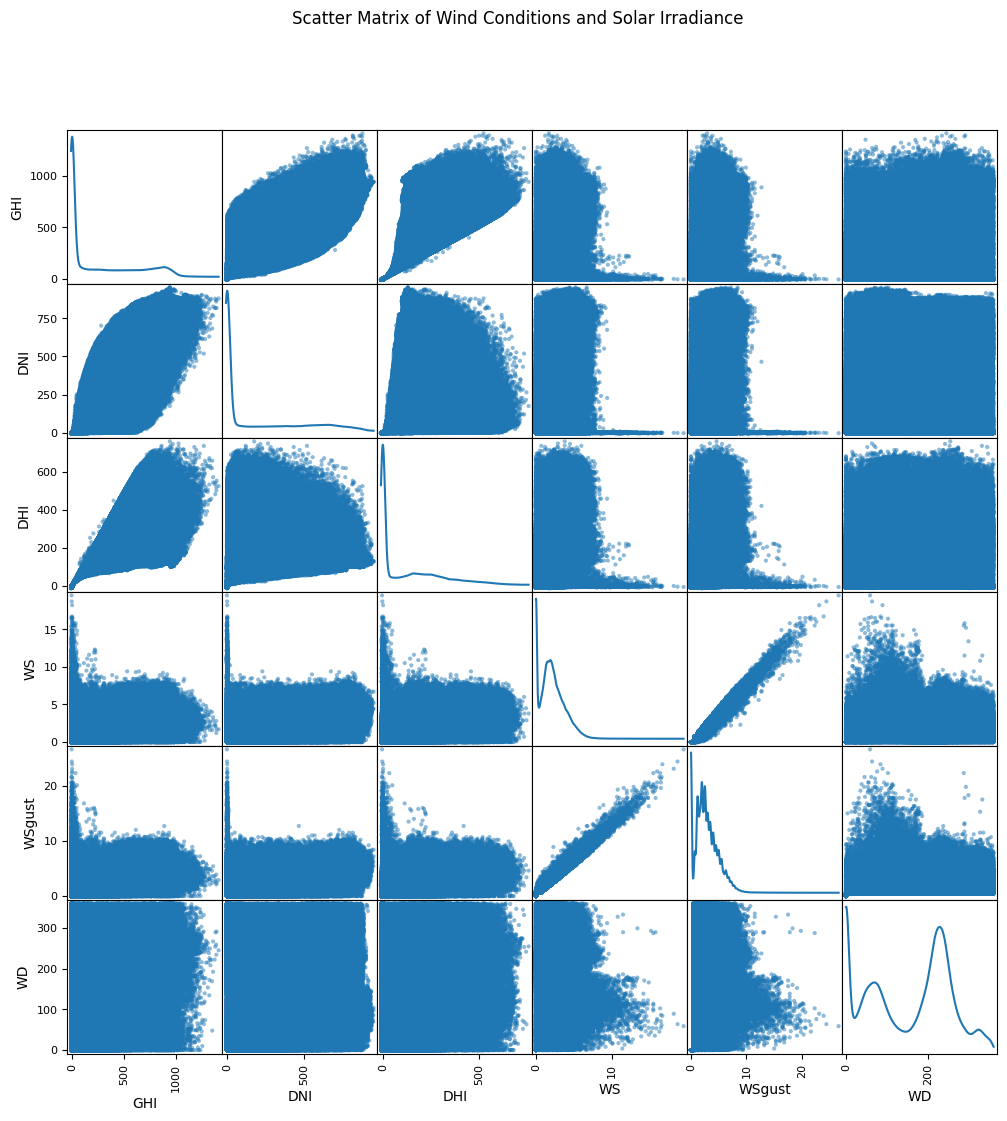

In [32]:
# Creating scatter matrix for wind conditions (WS, WSgust, WD) and solar irradiance (GHI, DNI, DHI)
scatter_matrix(correlation_data[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']], figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance')
plt.show()


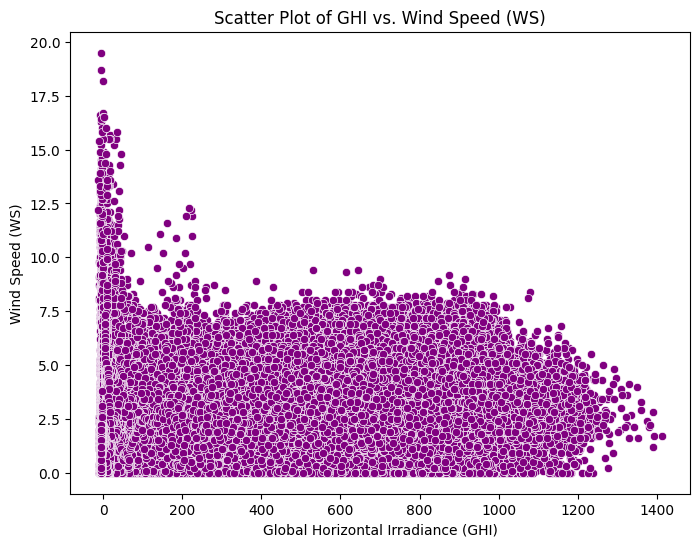

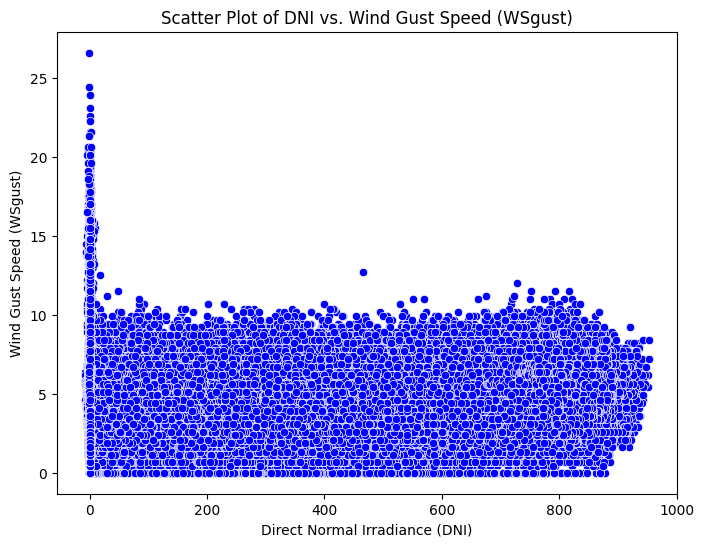

In [5]:
# Scatter plot between GHI and WS (Wind Speed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GHI'], y=df['WS'], color='purple')
plt.title('Scatter Plot of GHI vs. Wind Speed (WS)')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Wind Speed (WS)')
plt.show()

# Scatter plot between DNI and WSgust (Wind Gust Speed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['DNI'], y=df['WSgust'], color='blue')
plt.title('Scatter Plot of DNI vs. Wind Gust Speed (WSgust)')
plt.xlabel('Direct Normal Irradiance (DNI)')
plt.ylabel('Wind Gust Speed (WSgust)')
plt.show()


Wind Analysis: Use radial bar plots or wind roses Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\windrose\windrose.py:667: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


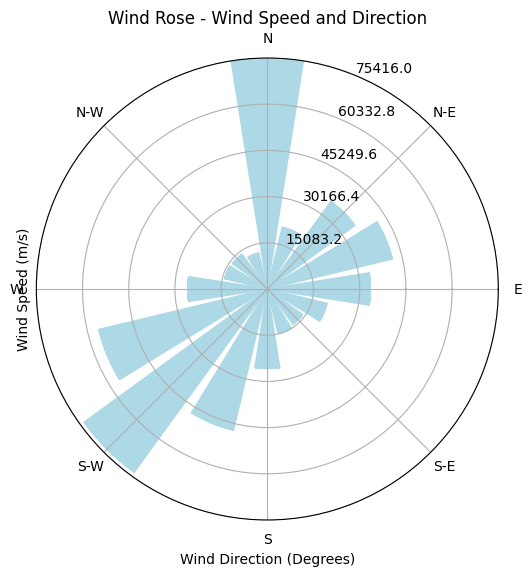

In [6]:
# Sample wind speed (WS) and wind direction (WD) data
wind_speed = df['WS']
wind_direction = df['WD']

# Create a wind rose
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='windrose')

# Plot the wind rose
ax.bar(wind_direction, wind_speed, bins=8, edgecolor='black', color='lightblue')

# Add title and labels
ax.set_title('Wind Rose - Wind Speed and Direction')
ax.set_xlabel('Wind Direction (Degrees)')
ax.set_ylabel('Wind Speed (m/s)')

# Display the plot
plt.show()

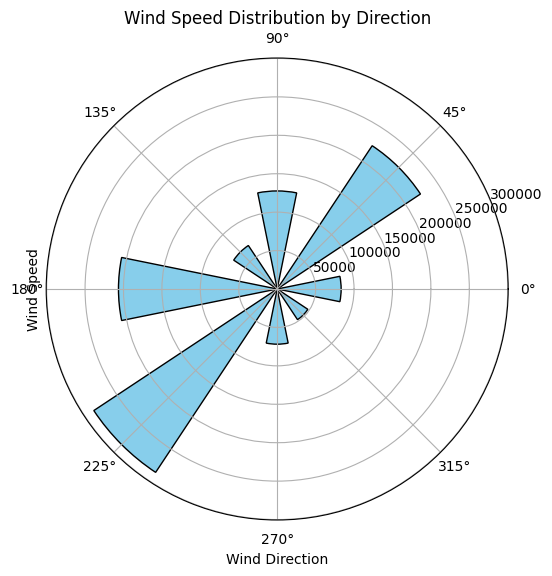

In [7]:
# Preprocess wind direction if it's not in radians
wind_direction_rad = np.radians(wind_direction)

# Create a radial bar plot (histogram) for wind speed by direction
num_bins = 8
wind_directions = np.linspace(0, 2 * np.pi, num_bins + 1)

# Compute histogram data
wind_speed_hist, _ = np.histogram(wind_direction_rad, bins=wind_directions, weights=wind_speed)

# Set up the radial bar plot
angles = wind_directions[:-1]  # Drop the last bin edge, it is the same as the first one
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Create the radial bars
bars = ax.bar(angles, wind_speed_hist, width=0.4, color='skyblue', edgecolor='black')

# Set labels and title
ax.set_title('Wind Speed Distribution by Direction')
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Wind Speed')

# Display the plot
plt.show()

In [10]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [8]:
# Compute the standard deviation of wind direction
wind_direction_std = np.std(wind_direction)
wind_direction_std

np.float64(102.3327446984213)

In [ ]:
# Plot wind speed over time
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['WS'], label='Wind Speed (m/s)', color='blue')
plt.title('Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

# Plot wind direction over time
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['WD'], label='Wind Direction (degrees)', color='green')
plt.title('Wind Direction Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.legend()
plt.show()


Temperature Analysis: Examine how relative humidity (RH) might influence temperature readings and solar radiation.

To analyze how relative humidity (RH) influences temperature readings and solar radiation (e.g., GHI, DNI, DHI), we can use various statistical techniques and visualizations to explore the relationships between these variables.

In [ ]:
# Check for missing values
df[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].isnull().sum()

# Summarize data for initial exploration
df[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].describe()


In [ ]:
# Correlation matrix to examine the relationship between RH, temperature, and solar radiation
correlation_matrix = df[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix: RH vs Temperature & Solar Radiation')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['RH'], y=df['TModA'], color='b', label='TModA', alpha=0.6)
sns.scatterplot(x=df['RH'], y=df['TModB'], color='r', label='TModB', alpha=0.6)
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['RH'], y=df['GHI'], color='green', label='GHI', alpha=0.6)
sns.scatterplot(x=df['RH'], y=df['DNI'], color='orange', label='DNI', alpha=0.6)
sns.scatterplot(x=df['RH'], y=df['DHI'], color='purple', label='DHI', alpha=0.6)
plt.title('Solar Radiation vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.show()


In [ ]:
# Reshape data for model
X = df[['RH']].values  # Independent variable (Relative Humidity)
y_temp = df['TModA'].values  # Dependent variable (Temperature)

# Instantiate the model
model_temp = LinearRegression()

# Fit the model
model_temp.fit(X, y_temp)

# Predict the temperature
y_pred_temp = model_temp.predict(X)

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['RH'], y=df['TModA'], color='blue', label='Actual Temperature')
plt.plot(df['RH'], y_pred_temp, color='red', label='Fitted Line (Temp)', linewidth=2)
plt.title('Linear Regression: Temperature vs RH')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Coefficients and Intercept
print("Regression Coefficients (Temp):", model_temp.coef_)
print("Intercept (Temp):", model_temp.intercept_)

In [ ]:
# Reshape data for model
y_ghi = df['GHI'].values  # Dependent variable (GHI)

# Instantiate the model for GHI
model_ghi = LinearRegression()

# Fit the model for GHI
model_ghi.fit(X, y_ghi)

# Predict the solar radiation (GHI)
y_pred_ghi = model_ghi.predict(X)

# Plot the regression line for GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['RH'], y=df['GHI'], color='green', label='Actual GHI')
plt.plot(df['RH'], y_pred_ghi, color='red', label='Fitted Line (GHI)', linewidth=2)
plt.title('Linear Regression: GHI vs RH')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.legend()
plt.show()

# Coefficients and Intercept for GHI
print("Regression Coefficients (GHI):", model_ghi.coef_)
print("Intercept (GHI):", model_ghi.intercept_)


In [ ]:
# Extract month from the date (assuming 'date' column exists)
df['month'] = df['timestamp'].dt.month

# Plot temperature vs RH by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='TModA', data=df, palette='Set2')
plt.title('Temperature vs Relative Humidity by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


Histograms: Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables.

To create histograms for the variables GHI (Global Horizontal Irradiance), DNI (Direct Normal Irradiance), DHI (Diffuse Horizontal Irradiance), WS (Wind Speed), and temperature variables like TModA and TModB, you can use Matplotlib and Seaborn to visualize their frequency distributions. Histograms will help you understand the distribution, skewness, and possible outliers in these variables.

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['GHI'], kde=True, color='blue', bins=30)
plt.title('Histogram of GHI (Global Horizontal Irradiance)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DNI'], kde=True, color='green', bins=30)
plt.title('Histogram of DNI (Direct Normal Irradiance)')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DHI'], kde=True, color='red', bins=30)
plt.title('Histogram of DHI (Diffuse Horizontal Irradiance)')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['WS'], kde=True, color='purple', bins=30)
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TModA'], kde=True, color='orange', bins=30)
plt.title('Histogram of Temperature ModA (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TModB'], kde=True, color='brown', bins=30)
plt.title('Histogram of Temperature ModB (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# GHI Histogram
sns.histplot(df['GHI'], kde=True, color='blue', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of GHI')
axes[0, 0].set_xlabel('GHI (W/m²)')
axes[0, 0].set_ylabel('Frequency')

# DNI Histogram
sns.histplot(df['DNI'], kde=True, color='green', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of DNI')
axes[0, 1].set_xlabel('DNI (W/m²)')
axes[0, 1].set_ylabel('Frequency')

# DHI Histogram
sns.histplot(df['DHI'], kde=True, color='red', bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Histogram of DHI')
axes[0, 2].set_xlabel('DHI (W/m²)')
axes[0, 2].set_ylabel('Frequency')

# WS Histogram
sns.histplot(df['WS'], kde=True, color='purple', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Wind Speed (WS)')
axes[1, 0].set_xlabel('Wind Speed (m/s)')
axes[1, 0].set_ylabel('Frequency')

# TModA Histogram
sns.histplot(df['TModA'], kde=True, color='orange', bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Temperature ModA')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Frequency')

# TModB Histogram
sns.histplot(df['TModB'], kde=True, color='brown', bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Histogram of Temperature ModB')
axes[1, 2].set_xlabel('Temperature (°C)')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Z-Score Analysis: Calculate Z-scores to flag data points that are significantly different from the mean

To perform a Z-Score Analysis and identify data points that are significantly different from the mean, we can calculate the Z-scores for numerical variables like GHI, DNI, DHI, WS, and temperature (e.g., TModA, TModB). A Z-score is a measure of how many standard deviations a data point is from the mean. A Z-score greater than 3 or less than -3 typically indicates an outlier.

In [ ]:
# List of columns to analyze
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

# Calculate Z-scores for the selected columns
df_zscores = df[columns_to_analyze].apply(zscore)

# Show the first few Z-scores for inspection
df_zscores.head()


In [ ]:
# Flagging the outliers for each variable
outliers = (df_zscores > 3) | (df_zscores < -3)

# Add a new column to the dataframe for the flag
df['outliers'] = outliers.any(axis=1)

# Display the rows with outliers flagged
df[df['outliers'] == True]


In [ ]:
# Create a boxplot to visualize outliers for selected columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_analyze])
plt.title('Boxplot for Variables with Z-Score Outliers')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for Z-scores of a specific variable (e.g., GHI)
sns.scatterplot(x=df.index, y=df_zscores['GHI'], color='blue', label='Z-scores of GHI')
plt.axhline(y=3, color='r', linestyle='--', label='Z-score threshold (+3)')
plt.axhline(y=-3, color='r', linestyle='--', label='Z-score threshold (-3)')
plt.title('Scatter Plot of Z-scores for GHI')
plt.xlabel('Index')
plt.ylabel('Z-score')
plt.legend()
plt.show()


Bubble charts to explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)


Creating a bubble chart is an excellent way to explore complex relationships between multiple variables. In this case, we will plot a bubble chart where:

GHI (Global Horizontal Irradiance) is on the x-axis.
Tamb (Ambient Temperature) is on the y-axis.
WS (Wind Speed) will be represented by the color of the bubbles.
RH (Relative Humidity) or BP (Barometric Pressure) will determine the size of the bubbles.

In [ ]:
# Set up a seaborn style
sns.set(style="whitegrid")

# Plotting the Bubble Chart
plt.figure(figsize=(10, 6))

# We use 'GHI' for x-axis, 'Tamb' for y-axis, 'WS' for color, and 'RH' for size of bubbles
plt.scatter(x=df['GHI'], y=df['Tamb'], 
            s=df['RH'] * 10,  # Scale the bubble size for better visibility
            c=df['WS'],       # Color the bubbles based on wind speed
            cmap='viridis',   # Choose a colormap
            alpha=0.7,        # Set transparency for bubbles
            edgecolors="w",   # White edges for the bubbles
            linewidth=0.5)

# Add labels and a color bar
plt.title('Bubble Chart: GHI vs Tamb vs WS with RH as Bubble Size', fontsize=14)
plt.xlabel('GHI (W/m²)', fontsize=12)
plt.ylabel('Tamb (°C)', fontsize=12)

# Add color bar for Wind Speed (WS)
plt.colorbar(label='Wind Speed (WS)')

# Show plot
plt.show()

Data Cleaning: Based on the initial analysis, clean the dataset by handling anomalies and missing values, especially in columns like Comments which appear entirely null.

To clean your dataset based on the initial analysis, particularly focusing on handling missing values and anomalies in columns like Comments (which are entirely null), here’s a step-by-step guide for data cleaning:

In [ ]:
print(df.isnull().sum())

# If the 'Comments' column is entirely null, we can drop it
df = df.drop(columns=['Comments'])

# Optionally, for other columns with missing values:
# - You can fill missing numerical columns with the mean, median, or mode
# - Or drop rows with missing values
# Example: Fill missing values with the mean (for numerical columns)
df['SomeNumericalColumn'] = df['SomeNumericalColumn'].fillna(df['SomeNumericalColumn'].mean())

# Or drop rows with missing values in specific columns:
# df = df.dropna(subset=['SomeColumn'])

# 2. Handle anomalies (negative or unrealistic values)
# For columns where only positive values are expected (e.g., GHI, DNI, WS), let's remove rows with negative values
df = df[df['GHI'] >= 0]  # Remove negative GHI values
df = df[df['DNI'] >= 0]  # Remove negative DNI values
df = df[df['WS'] >= 0]   # Remove negative Wind Speed values

# 3. Handle outliers (Optional - use Z-score or IQR for outlier detection)
from scipy import stats

# Calculate Z-scores for numerical columns to detect outliers
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'WS', 'Tamb', 'RH']]))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows with z-scores less than 3 (to remove outliers)

# Alternatively, use IQR for outlier detection (if desired)
Q1 = df[['GHI', 'DNI', 'WS', 'Tamb', 'RH']].quantile(0.25)
Q3 = df[['GHI', 'DNI', 'WS', 'Tamb', 'RH']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['GHI', 'DNI', 'WS', 'Tamb', 'RH']] < (Q1 - 1.5 * IQR)) | (df[['GHI', 'DNI', 'WS', 'Tamb', 'RH']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 4. Check the cleaned data
print("Cleaned Data:")
print(df.isnull().sum())
print(df.describe())

Dashboard Development Using Streamlit
Tasks:
Designing and developing a dashboard using Streamlit to visualize data insights.
Integrating Python scripts to fetch and process data dynamically.
Implementing interactive features (e.g., sliders, buttons) to allow users to customize visualizations.
